In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import h5py
url = '/content/gdrive/My Drive/ml project/Untitled folder/dataml.h5'
a = h5py.File(url,'r')
x_train = a['x_train']
y_train = a['Y_train']
x_test = a['x_test']
y_test = a['y_test']

In [0]:
import numpy as np
x_train=np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
x_train = x_train.reshape(-1,8,8,8,1)
x_test = x_test.reshape(-1,8,8,8,1)


In [4]:
import tensorflow as tf
from tensorflow import keras

new_model = keras.models.Sequential()

new_model.add(keras.layers.Conv3D(32, (3,3,1)  , activation = 'relu' , padding = 'same' , input_shape=(8,8,8,1)))
new_model.add(keras.layers.Conv3D(32, (3,3,1) , padding = 'same' , activation = 'relu' ))

new_model.add(keras.layers.MaxPooling3D((2,2,1) , padding = 'same'))
new_model.add(keras.layers.Conv3D(64, (3,3,1) , padding = 'same' , activation = 'relu' ))
new_model.add(keras.layers.Conv3D(64, (3,3,1) , padding = 'same' , activation = 'relu' ))
new_model.add(keras.layers.MaxPooling3D((2,2,1) , padding = 'same'))
new_model.add(keras.layers.Dropout(0.25))
new_model.add(keras.layers.Flatten())

new_model.add(keras.layers.Dense(120 , activation = 'relu'))
new_model.add(keras.layers.Dense(60 , activation = 'relu'))
new_model.add(keras.layers.Dense(1, activation = 'linear'))
              
new_model.compile(optimizer = 'adam' , loss = 'mean_squared_error' , metrics = ['accuracy' ])


W0620 13:57:26.349190 139714867754880 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
history = new_model.fit(x_train , y_train, epochs = 20 , batch_size = 5000, validation_split= .25)

Train on 452450 samples, validate on 150817 samples
Epoch 1/20
452450/452450 [==============================] - 33s 72us/sample - loss: 3.6375 - acc: 0.8125 - val_loss: 1.6555 - val_acc: 0.8286
Epoch 2/20
452450/452450 [==============================] - 32s 70us/sample - loss: 2.1515 - acc: 0.8376 - val_loss: 1.1583 - val_acc: 0.8395
Epoch 3/20
452450/452450 [==============================] - 32s 72us/sample - loss: 1.5136 - acc: 0.8523 - val_loss: 0.8446 - val_acc: 0.8568
Epoch 4/20
452450/452450 [==============================] - 33s 73us/sample - loss: 1.1111 - acc: 0.8632 - val_loss: 0.6576 - val_acc: 0.8696
Epoch 5/20
452450/452450 [==============================] - 33s 74us/sample - loss: 0.8832 - acc: 0.8703 - val_loss: 0.5673 - val_acc: 0.8725
Epoch 6/20
452450/452450 [==============================] - 34s 74us/sample - loss: 0.7454 - acc: 0.8759 - val_loss: 0.4833 - val_acc: 0.8834
Epoch 7/20
452450/452450 [==============================] - 34s 75us/sample - loss: 0.6290 - acc

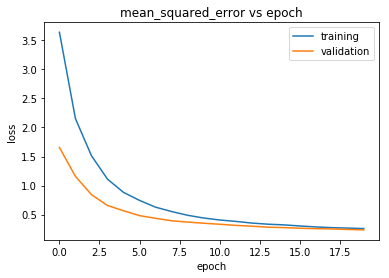

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'loss'
plt_title = 'mean_squared_error vs epoch'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['loss'] , label ='training')
plt.legend()
ax.plot(history.history['val_loss'] , label = 'validation')
plt.legend()
plt.show()

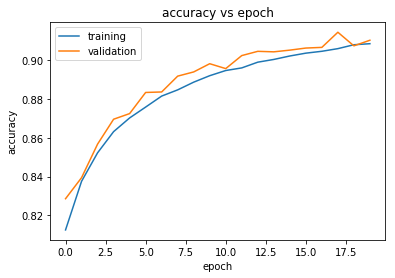

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'epoch'
ylabel = 'accuracy'
plt_title = 'accuracy vs epoch'
ax = fig.add_subplot(111,xlabel = xlabel , ylabel = ylabel , title = plt_title)
ax.plot(history.history['acc'] , label ='training')
plt.legend()
ax.plot(history.history['val_acc'] , label = 'validation')
plt.legend()
plt.show()

In [12]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d (Conv3D)              (None, 8, 8, 8, 32)       320       
_________________________________________________________________
conv3d_1 (Conv3D)            (None, 8, 8, 8, 32)       9248      
_________________________________________________________________
max_pooling3d (MaxPooling3D) (None, 4, 4, 8, 32)       0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 4, 4, 8, 64)       18496     
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 4, 4, 8, 64)       36928     
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 2, 2, 8, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 2, 2, 8, 64)       0